# 一、导入所需函数库

In [23]:
import pandas as pd
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import jieba
from jieba import analyse 
import matplotlib.pyplot as plt 
import json

# 二、导入数据-手推车
https://detail.tmall.com/item.htm?_u=t2dmg8j26111&id=698046317552

In [24]:
file_name = 'comments_stroller.csv'
data = pd.read_csv('./data/'+file_name)

# 三、查看数据基本内容

In [25]:
display(data)
#数据由评论内容组成

,content
0,身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！
1,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...
2,身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！
3,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...
4,看了好多测评最终选择了bebebus\n ...
...,...
89,对比了oneya，dearmom后，最终选择的bebebus，颜值高，质量好。今天收到就去遛...
90,宝宝刚满月，试了一下，稳定性高，对比了几家还是决定买的这个，一分价钱一分货，推着比较稳🥳🥳🥳🥳🥳🥳
91,非常好用，宝宝坐的很舒服出门必备
92,0天后追评：刚溜一圈回来，宝宝坐着很舒服，一点都不闹


In [26]:
data.describe()
#评价中有7个重复项

,content
count,94
unique,90
top,此用户没有填写评价。
freq,4


In [27]:
# 查看重复项
duplicates = data.duplicated(subset=['content'])
print(data[duplicates])

                                              content
2   身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！
38                                         此用户没有填写评价。
40                                         此用户没有填写评价。
46                                         此用户没有填写评价。


In [28]:
# 删除重复项并保留第一个出现的项
data = data.drop_duplicates()
display(data)
print('有效评论数量：', len(data))

,content
0,身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！
1,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...
3,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...
4,看了好多测评最终选择了bebebus\n ...
5,收纳空间:特别大 颜值:出门方便颜值高 操控性能:安全 物流服务:物流也很快 宝宝坐着很舒服...
...,...
89,对比了oneya，dearmom后，最终选择的bebebus，颜值高，质量好。今天收到就去遛...
90,宝宝刚满月，试了一下，稳定性高，对比了几家还是决定买的这个，一分价钱一分货，推着比较稳🥳🥳🥳🥳🥳🥳
91,非常好用，宝宝坐的很舒服出门必备
92,0天后追评：刚溜一圈回来，宝宝坐着很舒服，一点都不闹


有效评论数量： 90


In [29]:
data.describe()

,content
count,90
unique,90
top,身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！
freq,1


# 四、情感分析

使用了 snowNLP库中的 用评论数据集预训练过的 贝叶斯分类器 做情感分析

In [30]:
data['emotion'] = data['content'].apply(lambda x:SnowNLP(x).sentiments)
display(data)

,content,emotion
0,身边同事们都买的这个，就下单买了，真的很舒适很不错，天天带娃出去溜，娃长大了出去玩也能用，真不错！,0.999997
1,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...,0.819365
3,很好组装，颜值在线，重要的是车身很稳，使用稳定顺滑。宝宝还小还没出门，目前就在家使用，也很愿...,0.819365
4,看了好多测评最终选择了bebebus\n ...,1.000000
5,收纳空间:特别大 颜值:出门方便颜值高 操控性能:安全 物流服务:物流也很快 宝宝坐着很舒服...,0.999999
...,...,...
89,对比了oneya，dearmom后，最终选择的bebebus，颜值高，质量好。今天收到就去遛...,0.999905
90,宝宝刚满月，试了一下，稳定性高，对比了几家还是决定买的这个，一分价钱一分货，推着比较稳🥳🥳🥳🥳🥳🥳,0.958425
91,非常好用，宝宝坐的很舒服出门必备,0.979385
92,0天后追评：刚溜一圈回来，宝宝坐着很舒服，一点都不闹,0.181852


In [31]:
# 保存情绪
file_name = 'emotions_stroller.csv'
data.to_csv('./data/'+file_name)

In [32]:
data.describe()

,emotion
count,90.000000
mean,0.828151
std,0.309711
min,0.000601
25%,0.823620
50%,0.993429
75%,0.999887
max,1.000000


emotion的均值是0.83，中位数为0.99，25%分位数为0.82，都远高于0.5。

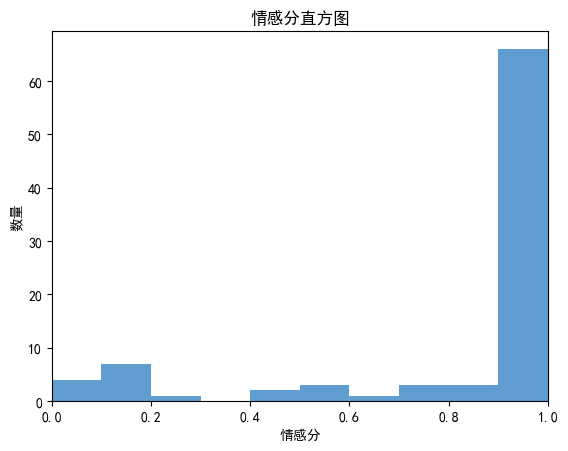

In [33]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bins=np.arange(0,1.1,0.1)
plt.hist(data['emotion'],bins,color='#4F94CD',alpha=0.9)
plt.xlim(0,1)
plt.xlabel('情感分')
plt.ylabel('数量')
plt.title('情感分直方图')
plt.show()

由直方图可以看出，评论内容偏向极度好评，在全部的90个评论中，约有67条在[0.9,1]之间，仅有约14条处于[0,0.5]之间。

# 五、提取关键词

使用了jieba库中的tf-idf算法提取关键词，tf-idf值越高，词的重要程度越高

In [34]:
# 定义停用词列表
stopwords = set(['天后', '追评', 'bebebus'])

text = ''
for s in data['content']:
    words = jieba.lcut(s)  # 使用jieba分词
    filtered_words = [word for word in words if word not in stopwords]  # 过滤停用词
    text += ''.join(filtered_words) + ' '  # 将过滤后的词重新组合成字符串

key_words = jieba.analyse.extract_tags(sentence=text, topK=30, withWeight=True, allowPOS=())
key_words

[('颜值', 0.373586484465625),
 ('宝宝', 0.2448302988084375),
 ('方便', 0.10038000490932598),
 ('质感', 0.0909382827322549),
 ('喜欢', 0.08735582725214461),
 ('车车', 0.08517572090686276),
 ('神器', 0.07235466648110293),
 ('收纳', 0.06882952216721813),
 ('顺滑', 0.0674651096452206),
 ('推车', 0.06656163331718137),
 ('操控', 0.06275515909522059),
 ('避震', 0.061345016131862745),
 ('婴儿车', 0.061345016131862745),
 ('很稳', 0.05860180148480392),
 ('不错', 0.05687714905974264),
 ('收车', 0.056649946874877455),
 ('舒适', 0.05654468805110294),
 ('好看', 0.055854623893750004),
 ('性能', 0.05409813096316176),
 ('起来', 0.05340042268633578),
 ('客服', 0.05312235928382353),
 ('座椅', 0.05139245653069853),
 ('特别', 0.0494557765715625),
 ('可以', 0.049398126715490195),
 ('非常', 0.048071402022941176),
 ('物流', 0.04798763497943627),
 ('车子', 0.047540687784252446),
 ('出门', 0.046363795047732845),
 ('质量', 0.04261079595352941),
 ('轮子', 0.04104755525847426)]

In [50]:
for i, keyword in enumerate(key_words):
    if i < len(key_words) - 1:
        print(keyword[0], end=', ')
    else:
        print(keyword[0])

颜值, 宝宝, 方便, 质感, 喜欢, 车车, 神器, 收纳, 顺滑, 推车, 操控, 避震, 婴儿车, 很稳, 不错, 收车, 舒适, 好看, 性能, 起来, 客服, 座椅, 特别, 可以, 非常, 物流, 车子, 出门, 质量, 轮子


In [35]:
# 保存关键词到字典
keywords_dict = dict()
keywords_dict['all'] = key_words

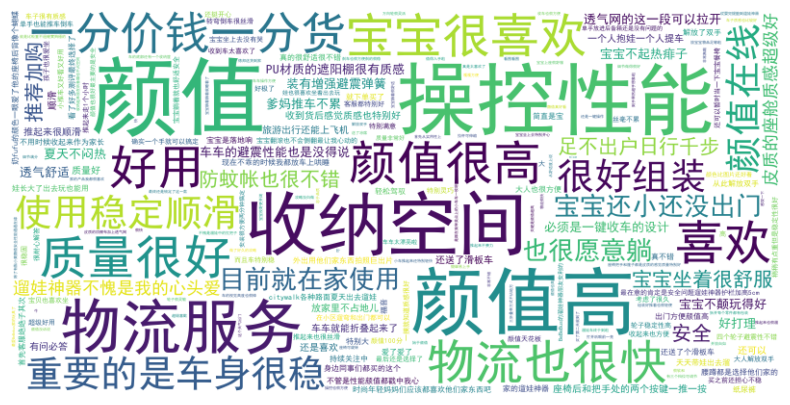

In [45]:
# 词云
# 创建词云对象
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 设置字体（需要中文字体支持）
    width=800,
    height=400,
    background_color='white'  # 设置背景颜色
).generate(text)

# 显示词云
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()

# 保存词云图片
file_name = 'wordcloud_stroller.png'
wordcloud.to_file('./data/'+file_name)

可以看出对于手推车，大家普遍关心的问题是颜值、方便程度、质感和质量、收纳和收车、是否顺滑、操控方式、避震性能、是否稳定、舒适程度、座椅、轮子、物流。

# 六、消极和积极评论

In [36]:
verypos_nlp = 0
littlepos_nlp = 0
littleneg_nlp = 0
veryneg_nlp = 0
for i in data['emotion']:
    if i >= 0.75:
        verypos_nlp += 1
    elif i >=0.5 and i <0.75:
        littlepos_nlp += 1
    elif i <0.5 and i >0.25:
        littleneg_nlp +=1
    else:
        veryneg_nlp += 1
print('非常积极、比较积极、比较消极、非常消极的评论数目分别为：',verypos_nlp, littlepos_nlp, littleneg_nlp, veryneg_nlp)

非常积极、比较积极、比较消极、非常消极的评论数目分别为： 70 6 3 11


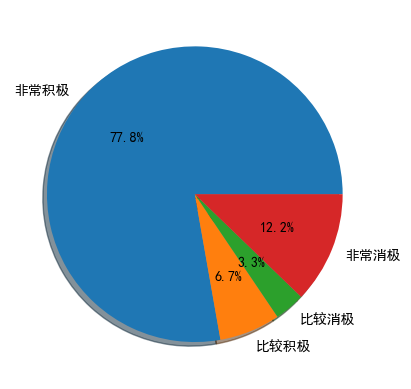

In [37]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pie_labels='非常积极','比较积极', '比较消极', '非常消极'
plt.pie([verypos_nlp, littlepos_nlp, littleneg_nlp, veryneg_nlp],labels=pie_labels,autopct='%1.1f%%',shadow=True)

plt.show() 

对于产品少数令消费者不满意的地方，细分比较消极和非常评论，看看问题出在哪里了

In [38]:
data_neg=data[data['emotion']<0.5]
display(data_neg)

,content,emotion
12,考虑了很久 最后还是选择了bebebus 颜值天花板 稍稍有点重但是稳定性很好 宝宝躺着就也...,0.192449
22,0天后追评：宝宝会坐之后 这个车非常方便 宝宝就想坐起来\n ...,0.123592
24,到货就拆箱用了，颜值高，高景观娃非常喜欢，直播间买还送滑板车🛴，会员积分也可以兑换纸尿裤🥳,0.118209
29,0天后追评：喜欢哟 喜欢他们家的颜值哈哈,0.028698
31,0天后追评：安利给身边朋友啦 颜值真好看,0.185007
33,此用户没有填写评价。,0.145428
35,车子颜值很高，买来给一月龄宝宝用的，卖家态度也好，有问必答。车子推出去回头率杠杠滴～^_^,0.135846
36,0天后追评：安装也很简单，车子有一定的分量，感觉很稳当,0.000601
47,0天后追评：他家的车太好了 推起来没有声音质量很不错\n ...,0.003994
49,0天后追评：买了以后一直在使用，挺方便哒。,0.010046


In [39]:
# 定义停用词列表
stopwords = set(['天后', '追评', 'bebebus'])

text_neg = ''
for s in data_neg['content']:
    words = jieba.lcut(s)  # 使用jieba分词
    filtered_words = [word for word in words if word not in stopwords]  # 过滤停用词
    text_neg += ''.join(filtered_words) + ' '  # 将过滤后的词重新组合成字符串

key_words_neg = jieba.analyse.extract_tags(sentence=text_neg, topK=30, withWeight=True, allowPOS=())
key_words_neg

[('颜值', 0.774049694432374),
 ('宝宝', 0.33818285878575544),
 ('天花板', 0.19998450353417266),
 ('车子', 0.16745266718827337),
 ('非常', 0.14110166924719422),
 ('方便', 0.13598796459215828),
 ('喜欢', 0.12307744754719424),
 ('好看', 0.10929825682805755),
 ('车车', 0.10000487519424461),
 ('纸尿裤', 0.09501820483021582),
 ('安利', 0.09210118966402878),
 ('有问必答', 0.09210118966402878),
 ('五颗星', 0.09003153446690647),
 ('不错', 0.08903933550647482),
 ('拆箱', 0.08600552160359712),
 ('滑板车', 0.08600552160359712),
 ('娃车', 0.08600552160359712),
 ('重实', 0.08600552160359712),
 ('刚溜', 0.08600552160359712),
 ('态度', 0.08480542167683452),
 ('杠杠', 0.08343951481294963),
 ('质量', 0.08338227697381295),
 ('回头率', 0.08275383006618704),
 ('真的', 0.08106104035064748),
 ('有点', 0.08055268859136691),
 ('月龄', 0.08005819373884893),
 ('售前', 0.08005819373884893),
 ('服务态度', 0.08005819373884893),
 ('安全', 0.07978845693122302),
 ('直播间', 0.07810183607410072)]

In [40]:
# 保存关键词到json文件
keywords_dict['negtive'] = key_words_neg

file_name = 'keywords_stroller.json'
with open('./data/'+file_name, 'w', encoding='utf-8') as json_file:
    json.dump(keywords_dict, json_file, indent=4, ensure_ascii=False)

由于收集到的评论数量较少，且部分消极评论实际是积极评论，所以人工校对了emotion分数<0.5的评论和关键词。发现空间稍小是造成用户体验不佳的原因。

发现有一部分积极评论被错误地划分为消极评论，说明在情感分析的方法上需要改进，有几种改进方法：  
1. 使用母婴类电商评论（现在使用的是通用电商评论）作为训练集，对贝叶斯分类器重新做训练；
2. 更换分类模型，如使用LDA主题模型，Bert，CRF等模型做情感分析；
3. 使用新的大语言模型+微调+提示词工程做情感分析（如LLaMA-Factory + Lora + Qwen1.5-7B https://github.com/GuoCoder/ai-app/tree/main/llm-train/comment）。